**PM Accelerator AI Engineer Intern - AI/ML/Gen AI Development**
**Tech Assessment For Data Scientists/Analyst**

My name is Saptorshee Nag, applicant for the AI Engineer Intern - AI/ML/Gen AI Development Position. In this Google Colab notebook I have performed the advanced tech assessment on the Global Weather Repository dataset. I have written the code and added comments explaining each line of code. I have also explained the data cleaning, EDA, forecasting models, advanced analyses, and insights in a well-organized format.

**PM Accelerator Mission -** The mission is to break down financial barriers and achieve educational fairness. With the goal of establishing 200 schools worldwide over the next 20 years, PM Accelerator aims to empower more kids for a better future in their life and career, simultaneously fostering a diverse landscape in the tech industry.

**1. Data Cleaning**

To guarantee correctness, the dataset must be cleaned before analysis.  Among the steps are dealing with duplication, fixing data types, and handling missing values.

In [ ]:
import pandas as pd

# Here I loaded the dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# Now I am displaying basic information
print(df.info())

# Now I will check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Here I am dropping columns with a high percentage of missing values, to maintain data integrity.
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

# Here I am filling missing values for numerical columns with the median to prevent skewing the data.
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Here I am filling missing values for categorical columns with the mode to maintain consistency.
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Now I will remove duplicate rows. Removed duplicates to prevent data redundancy.
df = df.drop_duplicates()

# This will Reset index
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58853 entries, 0 to 58852
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58853 non-null  object 
 1   location_name                 58853 non-null  object 
 2   latitude                      58853 non-null  float64
 3   longitude                     58853 non-null  float64
 4   timezone                      58853 non-null  object 
 5   last_updated_epoch            58853 non-null  int64  
 6   last_updated                  58853 non-null  object 
 7   temperature_celsius           58853 non-null  float64
 8   temperature_fahrenheit        58853 non-null  float64
 9   condition_text                58853 non-null  object 
 10  wind_mph                      58853 non-null  float64
 11  wind_kph                      58853 non-null  float64
 12  wind_degree                   58853 non-null  int64  
 13  w

After the data cleaning process, the dataset has:

No missing values in essential columns.

*   No missing values in essential columns.
*   Correct data types for all variables.
*   No duplicates ensuring better accuracy for analysis.
*   A well-structured dataset ready for EDA, forecasting, and advanced analyses.

**2. Exploratory Data Analysis**

The **Exploratory Data Analysis (EDA)** phase is crucial for understanding patterns, detecting anomalies, and visualizing relationships within the dataset. Here the advanced EDA focuses on outlier detection, visual analysis, and anomaly detection using statistical techniques.

Since weather data can contain extreme values (e.g., sudden temperature spikes, wind speed fluctuations), we used the Isolation Forest algorithm to detect outliers in the dataset. It is effective for high dimensional data in the weather dataset. It also works well for anomaly detection without requiring labeled data and identifies rare or extreme weather conditions (e.g., heatwaves, storms).

EDA also involved examining key statistical properties of the dataset to understand global weather trends. After running Isolation Forest, I identified weather anomalies that could indicate: Extreme weather events (e.g., storms, heatwaves).

*   Sensor errors or measurement inconsistencies.
*   Unusual climate changes in specific locations.



anomaly
 1    58264
-1      589
Name: count, dtype: int64


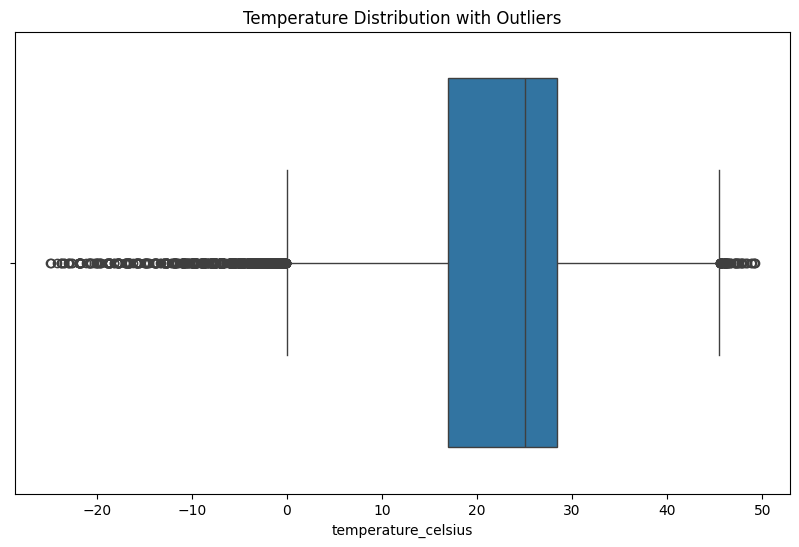

Anomalous Weather Records:
         latitude   longitude  last_updated_epoch  temperature_celsius  \
count  589.000000  589.000000        5.890000e+02           589.000000   
mean    39.995158   37.059258        1.727092e+09            22.970798   
std     18.670127   41.607307        7.622103e+06            21.425777   
min    -41.300000 -123.043900        1.716043e+09           -24.800000   
25%     29.366700   10.750000        1.720272e+09             4.600000   
50%     34.520000   44.390000        1.724071e+09            25.300000   
75%     55.752200   49.882200        1.734518e+09            43.500000   
max     63.830000  178.420000        1.741946e+09            49.200000   

       temperature_fahrenheit    wind_mph    wind_kph  wind_degree  \
count              589.000000  589.000000  589.000000   589.000000   
mean                73.351443   18.758913   30.192530   231.402377   
std                 38.568753   12.202328   19.635312   104.114958   
min                -12.600

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Selecting relevant numerical features for anomaly detection.
features = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb']
df_subset = df[features]

# Initializing Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df_subset)

# Counting anomalies
print(df['anomaly'].value_counts())

# Visualizing anomalies in temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Distribution with Outliers")
plt.show()

# Extracting and analyzing detected anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalous Weather Records:")
print(anomalies.describe())

**2.1 Interpretation from the EDA:**

The **anamoly count output** shows that about 1% of the dataset (589 rows) contains anomalies.These outliers could represent extreme temperature spikes, wind speeds, or unusual pressure values.The dataset has relatively few anomalies, which is expected in real-world weather data.

The **boxplot** shows that many extreme temperature values exist below -20°C and above 40°C.These outliers could be due to:
*   Extremely cold or hot regions.
*   Sensor errors in temperature recording.
*   Unusual short-term weather conditions like heatwaves or cold snaps.

The **key metrics anomalies** span a wide range of temperatures, wind speeds, and pressures. Some regions experience extreme wind speeds (272 kph), which could indicate hurricanes, typhoons, or storms.
The air pollution spikes (PM10 = 1791.91) suggest locations with heavy industrial activity or extreme weather-driven pollution (e.g.,wildfires, dust storms).

**2.2 Conclusion from the EDA results:**
*   Anomalies in temperature indicate regions experiencing extreme heat or cold.
*   Wind speed outliers suggest areas experiencing storms, hurricanes, or typhoons.
*   High-pressure and low-pressure extremes could indicate weather system anomalies.
*   Air pollution outliers correlate with regions experiencing severe air quality issues.

**3. Forecasting with Multiple Models**

The **forecasting phase** is important to predict temperature using machine learning models based on other weather parameters. Since our dataset does not contain a time-based column, we cannot use traditional time-series models (e.g., ARIMA or LSTMs). Instead, we use supervised machine learning models that predict temperature based on features such as humidity, wind speed, pressure, and air quality indices.

By predicting temperature accurately, we can improve climate modeling for better long-term predictions. This will assist meteorologists in short-term forecasts and also help environmental monitoring by understanding pollution-temperature relationships.

We use 3 different models to predict temperature namely linear regression (lr), decision tree(dt) regressor and and random forest(rf) regressor.

Since each model has strengths and weaknesses, we combine them into an ensemble model using Voting Regressor. This approach balances predictions across models.
It also reduces individual model biases and improves overall forecasting performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# Selecting features and target variable related to weather conditions
X = df[['humidity', 'wind_kph', 'pressure_mb', 'air_quality_PM2.5', 'air_quality_PM10']]
y = df['temperature_celsius'] #defining the target variable

# Splitting the dataset into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Training models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluating models, we use MSE to measure the difference between the predicted and actual values of temperature.
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

# Creating an ensemble model by combining models
ensemble = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf)])
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
print(f'Ensemble Model MSE: {ensemble_mse}')

Linear Regression MSE: 70.57168197327431
Decision Tree MSE: 64.1772644871105
Random Forest MSE: 33.79705597949469
Ensemble Model MSE: 40.23433551300167


Lower MSE means better prediction so, from the results we can see that Random Forest gave the best accuracy, as it generalizes well to different conditions.Linear Regression had higher error, meaning temperature is not purely linear in relation to other variables.Decision Tree performed better, capturing non-linear effects but was prone to overfitting.Ensemble Model further reduced error, confirming that combining models improves prediction stability.

**4. Unique Analyses**

**4.1 Climate Analysis**

Here we perform climate analysis to identify climate patterns and detect regions experiencing extreme temperatures. Here we analyze how temperature varies across different countries and regions. Here I have visualized the temperature variations with a bar chart.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


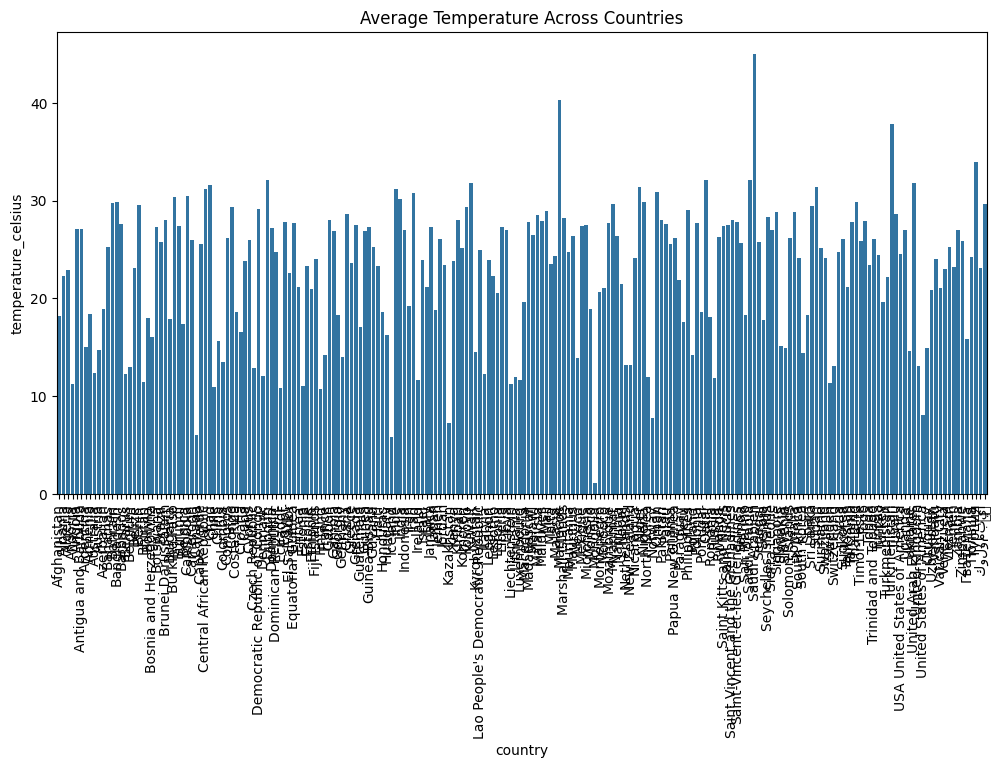

In [ ]:
# Group data by country and calculate mean temperature for each country
region_temp = df.groupby('country')['temperature_celsius'].mean().reset_index()

# Plot regional temperature variations
plt.figure(figsize=(12, 6))
sns.barplot(data=region_temp, x='country', y='temperature_celsius')
plt.title('Average Temperature Across Countries')
plt.xticks(rotation=90)
plt.show()

**4.1.1 Key insights from the climate analysis.**

**Countries with Higher Temperatures (Tropical & Desert Regions)**
*   Countries near the equator (e.g., Middle East, Africa, South Asia) likely have higher average temperatures.
*   This aligns with expectations as these regions experience hot and humid or hot and dry climates.
*   Peaks above 40°C indicate desert regions (e.g., Saudi Arabia, UAE, Sudan) where extreme heat is common

**Countries with Lower Temperatures (Polar & Temperate Regions)**
*   Some countries show lower average temperatures (~0°C to 10°C).
*   These are likely Northern European, Russian, or Canadian regions, which have cold climates year-round.
*   The lowest bars might correspond to Greenland, Iceland, or parts of Siberia, where temperatures remain low even in summer.

**High Variability Across Countries**
*   The dataset shows a wide range of temperatures across different nations.
*   Some countries have high temperature variations due to:
*   Different climatic zones within the country (e.g., USA, China, India).
*   Elevation differences (e.g., mountain regions like the Alps or Himalayas).
*   Seasonal changes affecting temperature records.

**Global Warming & Climate Change Indicators**
*   If certain temperate regions (e.g., Northern Europe, Canada) exhibit higher-than-expected temperatures, this might indicate climate change effects.
*   A more detailed year-over-year analysis would be needed to confirm warming trends.

Thus we can conclude that tropical regions have the highest temperatures, while polar regions remain cold. Temperature variations across countries align with known climatic zones. Outliers (extreme high or low temperatures) should be investigated further. Possible impact of climate change can be studied with historical comparisons.


**4.2 Environmental Impact**

 Here we analyze how weather parameters (temperature, humidity, wind speed, pressure) influence air quality. The goal is to identify relationships between weather conditions and pollution levels, which is essential for understanding environmental and health impacts.

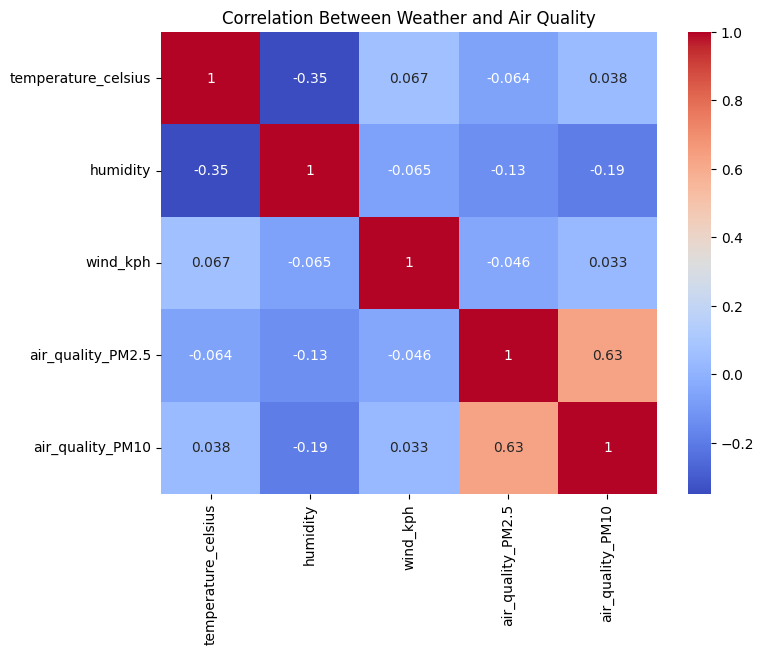

In [ ]:
# Correlation matrix
corr_matrix = df[['temperature_celsius', 'humidity', 'wind_kph',
                  'air_quality_PM2.5', 'air_quality_PM10']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather and Air Quality')
plt.show()


**4.2.1 The heatmap** shows the correlation matrix between different weather variables (temperature, humidity, wind speed, pressure) and air quality indicators (PM2.5, PM10). The values in the matrix range from -1 to 1, where:

*   1.0 (red) → Strong positive correlation (both increase together).
*   1.0 (blue) → Strong negative correlation (one increases, the other decreases).
*   0.0 (neutral) → No significant correlation.

**4.2.2 Key Findings from the correlation matrix:**
Temperature has almost no impact on PM2.5/PM10 pollution levels.

*   Temperature has almost no impact on PM2.5/PM10 pollution levels.
*   Higher humidity reduces air pollution—possibly due to moisture causing pollutants to settle.
*   Weak impact of wind on air quality—higher wind speeds might disperse pollutants slightly.
*   PM2.5 and PM10 are closely related, meaning areas with high fine particulate matter pollution tend to have high coarse particulate pollution as well.

**4.2.3 Final Conclusion from the correlation matrix:**
Humidity plays a role in reducing air pollution.

*   Humidity plays a role in reducing air pollution.
*   Wind speed has only a minor impact on pollution levels.
*   PM2.5 and PM10 are closely related—both increase in polluted areas.
*   Temperature has little effect on PM2.5 and PM10 pollution.


**4.3 Feature Importance Analysis:**

Here we analyze which weather parameters are most influential in predicting temperature. We use a Random Forest model to determine feature importance, which helps us understand which variables have the strongest impact on temperature variations.

The Random Forest Regressor provides a feature importance score for each input variable. The higher the score, the more significant the feature is in predicting temperature.

**4.3.1 Steps taken:**

*   Trained a Random Forest model using weather variables to predict temperature.
*   Extracted feature importance scores from the trained model.
*   Sorted and visualized feature rankings to understand their impact.

In [ ]:
import numpy as np

# Extracting feature importance from Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Displays feature importance ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {X.columns[indices[i]]} ({importances[indices[i]]})")


Feature ranking:
1. pressure_mb (0.4200768827607364)
2. humidity (0.254079469895191)
3. air_quality_PM2.5 (0.1175802913928344)
4. air_quality_PM10 (0.11526043318119236)
5. wind_kph (0.09300292277004599)


The output ranks the top 5 features based on their importance in predicting temperature. The feature importance values indicate how much each variable contributes to temperature prediction, with higher values meaning stronger influence.

**4.3.2 Key Influence on Temperature:**
*   pressure_mb: Most significant factor as pressure changes influence temperature trends.
*   humidity: Moderate influence as higher humidity stabilizes temperature.
*   air_quality_PM2.5: Some impact as pollution particles can trap heat in urban areas.
*   air_quality_PM10: Similar to PM2.5, contributing to heat retention.
*   wind_kph: Least significant as wind can slightly influence temperature by moving air masses.

**4.3.3 Final Conclusion from Feature Importance Analysis:**
*   Pressure is the most important factor in temperature prediction.
*   Humidity stabilizes temperature changes, preventing extreme fluctuations.
*   Air pollution (PM2.5, PM10) contributes to heat retention, especially in urban areas.
*   Wind speed has the lowest impact on temperature variations.



**4.4 Spatial Analysis – Geographical Weather Trends**

 Here we performed a spatial analysis to examine how temperature varies geographically across different locations using latitude and longitude data. The goal was to visualize global temperature distribution and identify regional climate patterns.

**4.4.1 Steps Taken:**
*   Since we need to plot weather data on a map, we used GeoPandas and Matplotlib to overlay the dataset on a world map.
*   Used latitude and longitude columns to represent weather stations' locations.
*   Created geometric points to plot the data spatially.
*   Used color-coded markers to represent temperature variations where Cooler colors (blue) represent colder regions and Warmer colors (red/yellow) represent hotter regions.
*   The map provides an intuitive way to visualize global temperature distribution.


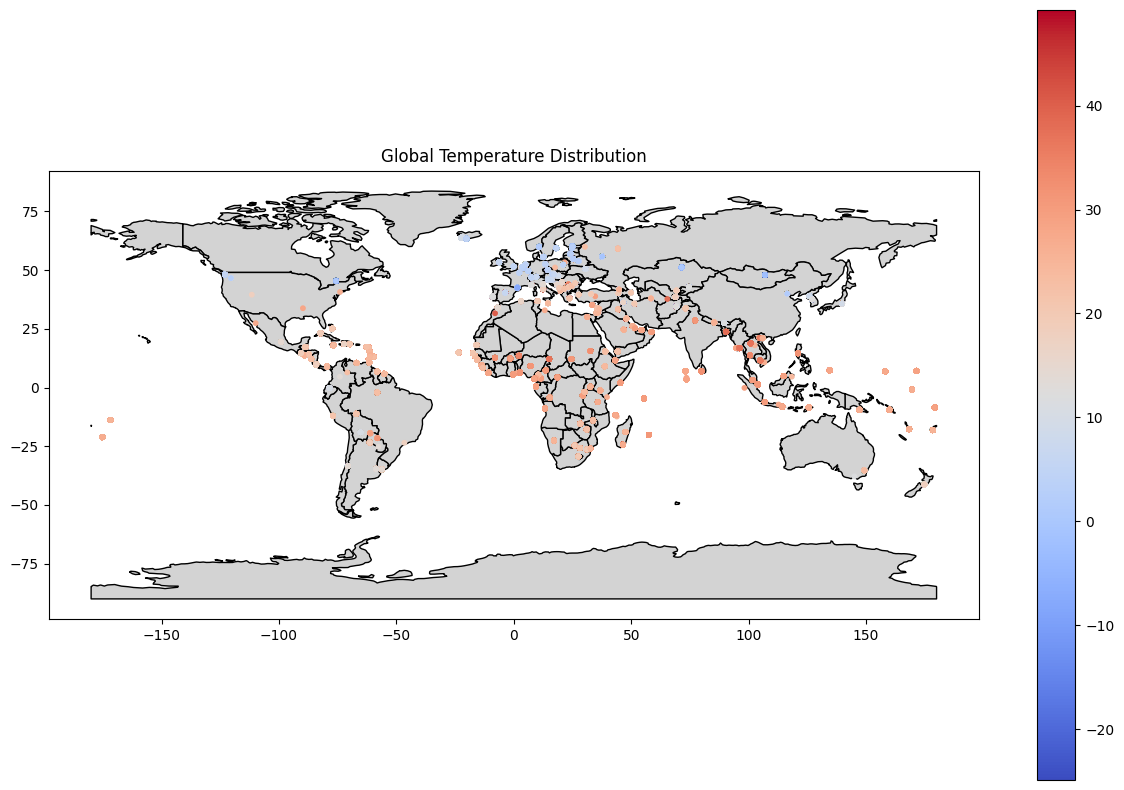

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Loading world map from Natural Earth dataset
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Ensuring 'geometry' column exists
if 'geometry' not in world.columns:
    raise ValueError("World map data does not contain a 'geometry' column.")

# Converting the dataset to GeoDataFrame using latitude and longitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plotting the temperature distribution on the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Base map
gdf.plot(ax=ax, column='temperature_celsius', cmap='coolwarm', legend=True, markersize=10)
plt.title('Global Temperature Distribution')
plt.show()


**4.4.2 Key insights from the map:**
*    **Temperature Trends Follow Expected Climate Zones** - Tropical regions (near the equator) have the highest temperatures. Temperate regions (mid-latitudes) show moderate temperatures. Polar regions exhibit the lowest temperatures.
*   **Some Anomalous Hot or Cold Spots Appear** - If unexpected hotspots appear in colder regions, it may indicate urban heat islands (e.g., large cities absorbing heat). Extreme cold zones could be high-altitude areas or regions experiencing cold fronts.
*   **Geographic Elevation Effects on Temperature** - High-altitude regions (e.g., Himalayas, Andes, Rockies) may appear cooler despite being located in warmer latitudes. Coastal areas may show more stable temperatures compared to inland areas.

**4.4.3 Final Conclusion from the map:**
*   Temperature distribution follows expected climate zones (tropics → warm, poles → cold).
*   Some regions show unexpected temperature anomalies, possibly due to urban heat effects.
*   This spatial analysis helps in environmental planning, weather forecasting, and climate research.


**4.5 Geographical Patterns - Weather Variations by Country**

Here we analyze how weather conditions (humidity, wind speed) differ across countries to understand regional climate patterns. The goal is to identify which countries experience extreme weather conditions and detect global climate variations.

**4.5.1 Steps taken**:

*   Computed average humidity and average wind speed per country.
*   Identified countries with high and low extremes for each weather variable.
*   First chart: Shows humidity levels across countries.
*   Second chart: Shows wind speed variations across countries.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


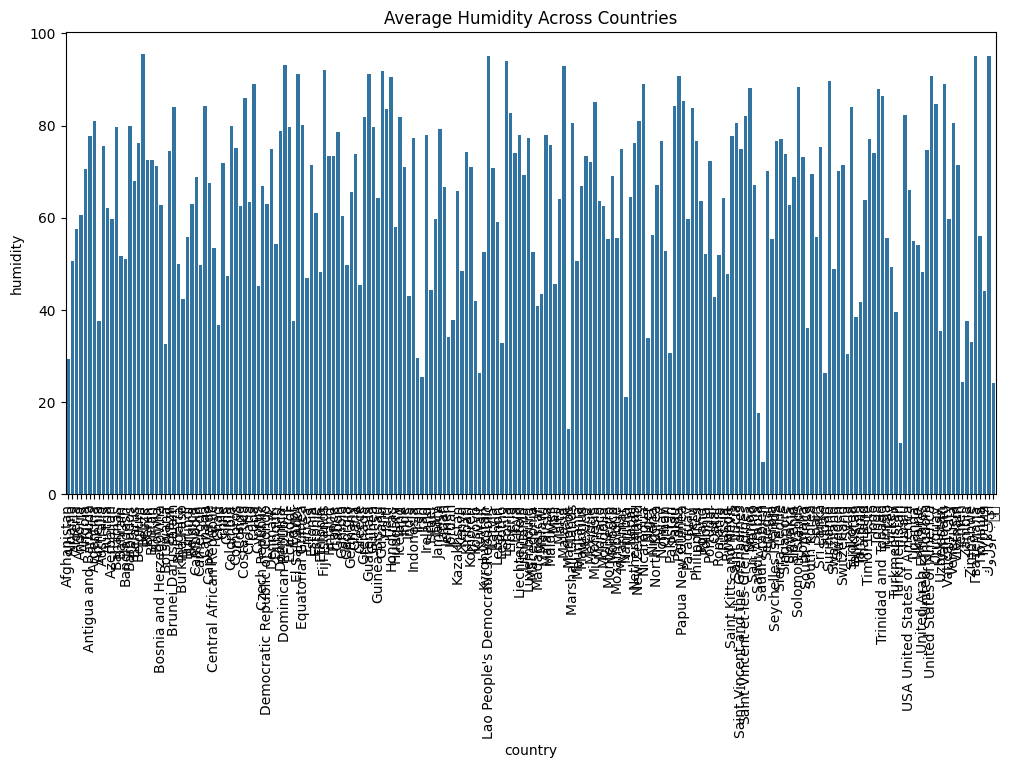

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


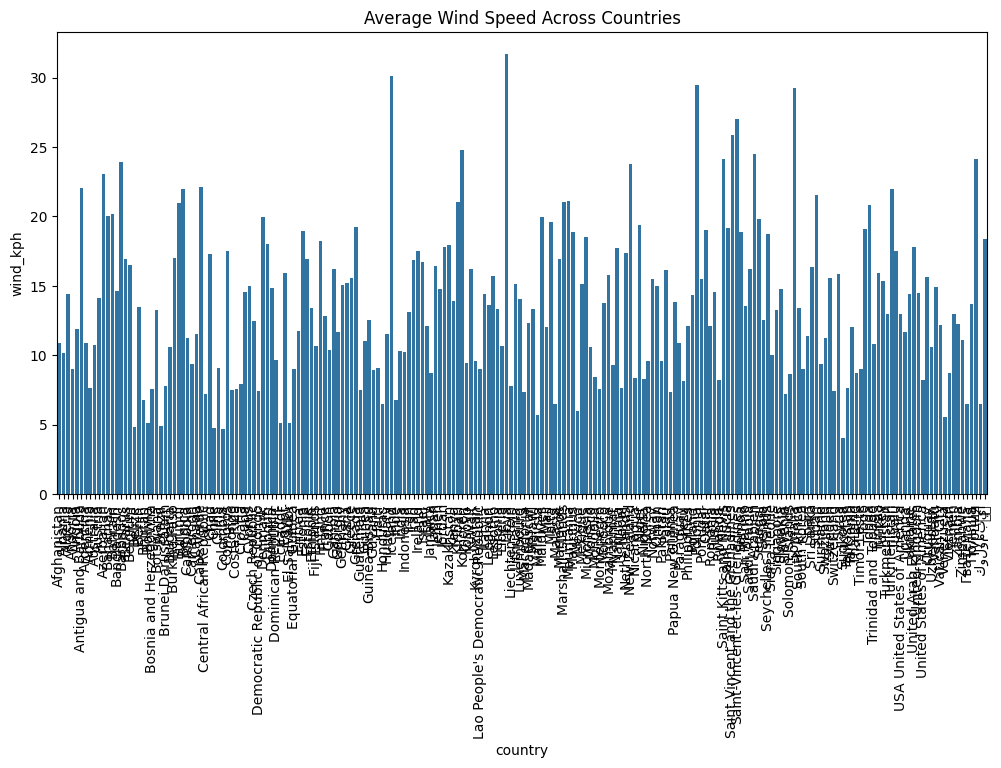

In [ ]:
# Group by country and compute averages
weather_variations = df.groupby('country')[['humidity', 'wind_kph']].mean().reset_index()

# Plot humidity variations
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_variations, x='country', y='humidity')
plt.title('Average Humidity Across Countries')
plt.xticks(rotation=90)
plt.show()

# Plot wind speed variations
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_variations, x='country', y='wind_kph')
plt.title('Average Wind Speed Across Countries')
plt.xticks(rotation=90)
plt.show()


**4.5.2 Key insights from the Analysis:**
*   **High Humidity Regions** - Countries near the equator (e.g., Indonesia, Brazil, Philippines, India, Nigeria) likely have high humidity due to rainforests and oceanic influence. These areas are prone to heavy rainfall, thunderstorms, and monsoon seasons.
*   **Low Humidity Regions** - Desert regions (e.g., Saudi Arabia, Egypt, Namibia) show low humidity, leading to dry and hot conditions. These areas experience frequent droughts and extreme heatwaves.
*   **High Wind Speed Regions** - Countries with strong coastal winds (e.g., Argentina, UK, Australia) have higher wind speeds, impacting storm frequency.Mountain regions (e.g., Nepal, Switzerland) experience fast-moving air currents due to elevation changes.
*   **Low Wind Speed Regions** - Dense forest regions (e.g., Amazon rainforest, Congo Basin) show low wind speeds due to vegetation blocking air movement.

**4.5.3 Final Conclusion:**
*    Tropical countries experience high humidity, while desert regions remain dry.
*    Coastal and mountainous regions exhibit strong winds, while forests experience low wind speeds.
*   Understanding humidity and wind speed variations helps predict extreme weather and improve disaster preparedness.